<a href="https://colab.research.google.com/github/kumnikhil/deep-reinforcement-learning/blob/master/alphavantage_intraday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import requests
import numpy as np 
from dateutil import parser
import logging
import io
import requests
logger =  logging.getLogger()


In [14]:
alphavantage_apikeys = {"api_key": "5U619A505HJWT8S1"}

In [15]:
url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey={alphavantage_apikeys['api_key']}"
url

'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=5U619A505HJWT8S1'

In [49]:
import csv
import requests
import json 
import io 
from tqdm import tqdm 

def alphavantage_hist_intraday(symbol,interval_str,slice_yr_cnt,slice_month_cnt,api_key='5U619A505HJWT8S1'):
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
  CSV_URL = f"""https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol={symbol}&interval={interval_str}&slice=year{slice_yr_cnt}month{slice_month_cnt}&apikey={api_key}&outputsize=full"""
  r = requests.get(CSV_URL)
  df =  pd.read_csv(io.StringIO(r.content.decode('utf-8')))
  df['time'] = pd.to_datetime(df['time'])
  
  return df

In [50]:
symbol =  'AAPL'
interval_str = '15min'
slice_yr_cnt = 1
slice_month_cnt =1
sl1_ = alphavantage_hist_intraday(symbol,interval_str,slice_yr_cnt,slice_month_cnt,api_key='5U619A505HJWT8S1')


In [52]:
sl1_.sort_values(by='time',ascending=True)

,time,open,high,low,close,volume
1343,2022-08-22 04:15:00,170.29,170.29,169.01,169.29,68825
1342,2022-08-22 04:30:00,169.29,169.41,169.03,169.18,38868
1341,2022-08-22 04:45:00,169.18,169.18,168.78,168.89,45838
1340,2022-08-22 05:00:00,168.85,168.89,168.64,168.74,23701
1339,2022-08-22 05:15:00,168.80,168.90,168.61,168.80,19597
...,...,...,...,...,...,...
4,2022-09-20 19:00:00,156.78,156.82,156.70,156.81,13065
3,2022-09-20 19:15:00,156.81,156.87,156.49,156.50,22448
2,2022-09-20 19:30:00,156.50,156.56,156.45,156.56,7976
1,2022-09-20 19:45:00,156.51,156.66,156.46,156.66,21884


In [43]:
import io 
pd.read_csv(io.StringIO(r.content.decode('utf-8')))

,time,open,high,low,close,volume
0,2022-09-20 18:45:00,125.860,125.86,125.8600,125.86,1000
1,2022-09-20 17:00:00,126.300,126.30,126.3000,126.30,1316
2,2022-09-20 16:15:00,126.300,126.30,126.3000,126.30,70800
3,2022-09-20 16:00:00,126.590,126.65,126.1850,126.30,293241
4,2022-09-20 15:45:00,126.180,126.62,126.0650,126.57,133039
...,...,...,...,...,...,...
800,2022-08-22 09:00:00,137.050,137.05,137.0500,137.05,310
801,2022-08-22 08:15:00,137.192,137.86,137.0101,137.35,2106
802,2022-08-22 07:45:00,137.400,137.40,137.4000,137.40,359
803,2022-08-22 07:15:00,137.350,137.35,137.3500,137.35,119


In [23]:
import csv
import requests
symbol =  'AP'
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
CSV_URL = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol=IBM&interval=min&slice=year1month1&apikey=5U619A505HJWT8S1&outputsize=full'

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    for row in my_list:
        print(row)

Streaming output truncated to the last 5000 lines.
['2022-09-08 10:27:00', '127.54', '127.56', '127.49', '127.545', '2984']
['2022-09-08 10:26:00', '127.55', '127.57', '127.505', '127.505', '3181']
['2022-09-08 10:25:00', '127.505', '127.535', '127.44', '127.535', '10750']
['2022-09-08 10:24:00', '127.61', '127.645', '127.5', '127.5', '8245']
['2022-09-08 10:23:00', '127.72', '127.72', '127.6', '127.61', '6429']
['2022-09-08 10:22:00', '127.72', '127.72', '127.64', '127.64', '5764']
['2022-09-08 10:21:00', '127.67', '127.71', '127.65', '127.6702', '8269']
['2022-09-08 10:20:00', '127.56', '127.69', '127.52', '127.67', '8665']
['2022-09-08 10:19:00', '127.52', '127.5899', '127.48', '127.56', '8694']
['2022-09-08 10:18:00', '127.41', '127.605', '127.35', '127.54', '18826']
['2022-09-08 10:17:00', '127.3', '127.385', '127.22', '127.385', '8265']
['2022-09-08 10:16:00', '127.33', '127.39', '127.27', '127.27', '6714']
['2022-09-08 10:15:00', '127.2', '127.38', '127.15', '127.35', '7692']
['

In [ ]:
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,symbol,source
Date,,,,,,,,
2022-09-14,2610.00,2572.75,2575.00,2588.35,4004997.0,2588.35,RELIANCE.NS,yahoo_datareader
2022-09-15,2603.55,2556.75,2583.00,2562.70,4783723.0,2562.70,RELIANCE.NS,yahoo_datareader
2022-09-16,2553.00,2491.00,2543.75,2499.20,9330469.0,2499.20,RELIANCE.NS,yahoo_datareader
2022-09-19,2522.70,2481.35,2499.20,2502.45,3498286.0,2502.45,RELIANCE.NS,yahoo_datareader
2022-09-20,2537.70,2494.70,2522.45,2502.85,3880011.0,2502.85,RELIANCE.NS,yahoo_datareader


In [ ]:
window_size = 10 #how many previous timesteps our trading bot has as reference points when it makes its next trade
"""frame_bound :specifies the start and end of our df. 
      The first parameter on the frame_bound should always be equal to the window_size so that it has the five sets of previous data. 
      For the second parameter, you can adjust it to any value of your choice depending on your data."""

frame_bound = (window_size,df.shape[0]-window_size)
env = gym.make(f'stocks-v0', df=df, frame_bound=frame_bound, window_size=window_size)

In [ ]:
env.signal_features

array([[ 839.195,    0.   ],
       [ 833.45 ,   -5.745],
       [ 809.725,  -23.725],
       ...,
       [2530.5  ,  -29.9  ],
       [2569.8  ,   39.3  ],
       [2596.85 ,   27.05 ]])

In [ ]:
env.action_space

Discrete(2)

info {'total_reward': 802.9620000000009, 'total_profit': 0.02042943486776594, 'position': 1}


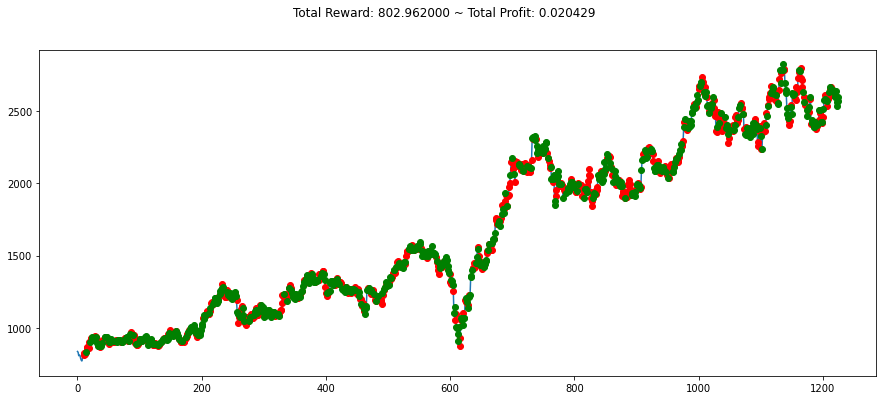

In [ ]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
env_maker = lambda:gym.make(f'stocks-v0', df=df, frame_bound=frame_bound, window_size=window_size)
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




----------------------------------
| explained_variance | -1.07e-05 |
| fps                | 8         |
| nupdates           | 1         |
| policy_entropy     | 0.693     |
| total_timesteps    | 5         |
| value_loss         | 1.56e+03  |
----------------------------------
---------------------------------
| explained_variance | 0.000419 |
| fps                | 242      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 3.57e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.00144 |
| fps                | 289      |
| nupdates           | 200      |
| policy_entropy     | 0.693    |
| total_timesteps    | 1000     |
| value_loss         | 9.34e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.0107   |
| fps                | 306      |
| nupdates           | 300      |
| policy_entropy     | 0.693    |
| tota

KeyboardInterrupt: ignored

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=frame_bound, window_size=window_size)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 394.01199999999915, 'total_profit': 0.016901209700850017, 'position': 1}


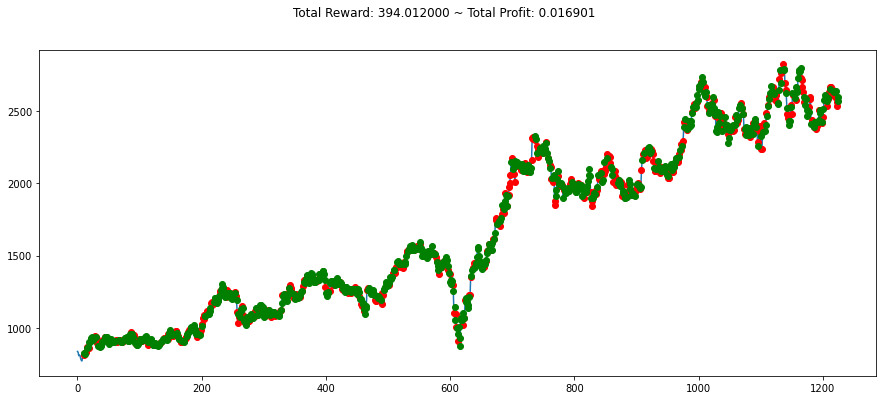

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()